*Load datasets based from all csv's*

In [33]:
using Pkg
Pkg.add("Flux")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %]  95.2 %

  Resolving package versions...
  Installed MuladdMacro ────────── v0.2.2
  Installed ZipFile ────────────── v0.9.4
  Installed DiffResults ────────── v1.0.3
  Installed DiffRules ──────────── v1.5.0
  Installed AbstractTrees ──────── v0.3.4
  Installed LogExpFunctions ────── v0.3.0
  Installed IRTools ────────────── v0.4.7
  Installed Flux ───────────────── v0.11.1
  Installed FillArrays ─────────── v0.8.14
  Installed Functors ───────────── v0.1.0
  Installed AbstractFFTs ───────── v0.5.0
  Installed ChainRulesCore ─────── v0.8.1
  Installed ChainRules ─────────── v0.6.5
  Installed SpecialFunctions ───── v1.1.0
  Installed Juno ───────────────── v0.8.4
  Installed ForwardDiff ────────── v0.10.33
  Installed ZygoteRules ────────── v0.2.2
  Installed CommonSubexpressions ─ v0.3.0
  Installed ArrayLayouts ───────── v0.3.8
  Installed Zygote ─────────────── v0.5.1
  Installed Media ──────────────── v0.5.0
  Installed DocStringExtensions ── v0.8.6
   Updating `~/.julia/environments/v1.4/

In [1]:
using CSV
using DataFrames
using Plots
using Flux
using Flux: throttle

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260
┌ Info: Precompiling Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1260


In [2]:
df = CSV.read("../datasets/Amsterdam/listings.csv",DataFrame)

,id,name,host_id,host_name
,Int64,String,Int64,String
1,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel
2,20168,Studio with private bathroom in the centre 1,59484,Alexander
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip
4,28871,Comfortable double room,124245,Edwin
5,29051,Comfortable single room,124245,Edwin
6,44391,Quiet 2-bedroom Amsterdam city centre apartment,194779,Jan
7,49552,Multatuli Luxury Guest Suite in top location,225987,Joanna & MP
8,50523,B & B de 9 Straatjes (city center),231946,Raymond
9,55709,Bright Loft in Centre Amsterdam,263233,Jan-Willem


In [3]:
print(df)

6893×18 DataFrame
  Row │ id                  name                               host_id    host_name                          neighbourhood_group  neighbourhood                      latitude  longitude  room_type        price  minimum_nights  number_of_reviews  last_review  reviews_per_month  calculated_host_listings_count  availability_365  number_of_reviews_ltm  license                  
      │ Int64               String                             Int64      String                             Missing              String                             Float64   Float64    String15         Int64  Int64           Int64              Dates.Date?  Float64?           Int64                           Int64             Int64                  String31?                
──────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Excessive output truncated after 524288 bytes.

In [4]:
function get_distance_from_city_center(x,y)
    amsterdam_city_center = [52.3791, 4.9003]
    return sqrt((x - amsterdam_city_center[1])^2 + (y - amsterdam_city_center[2])^2)
end

get_distance_from_city_center (generic function with 1 method)

In [5]:
# create a new column with the distance from the city center
df.distance_from_city_center = get_distance_from_city_center.(df.latitude,df.longitude)

6893-element Array{Float64,1}:
 0.045724401581650025
 0.01632414775723633
 0.011971486958603795
 0.01472436416284217
 0.01613331026169318
 0.01620816152437004
 0.0094836965366883
 0.020817360543545688
 0.021156268881825844
 0.027666392970535313
 0.03427521699420647
 0.005956710501610961
 0.021278693568919253
 ⋮
 0.06445729128656012
 0.08299929763135505
 0.062099835611657
 0.06952272437124396
 0.0846839453497516
 0.06981531207407415
 0.08144533688309118
 0.07106033563107081
 0.07798449140694576
 0.060792638534613065
 0.08482342247280379
 0.06287860844516131

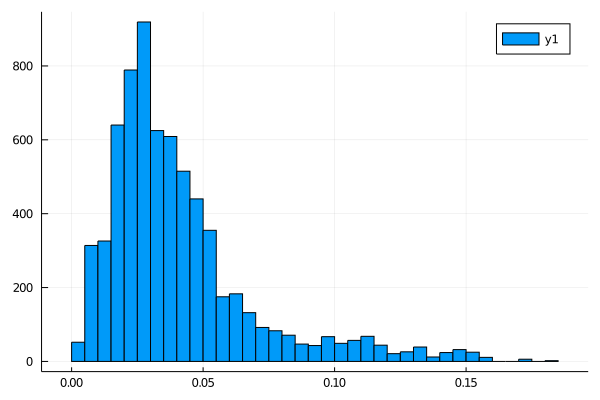

In [20]:
histogram(df.distance_from_city_center)

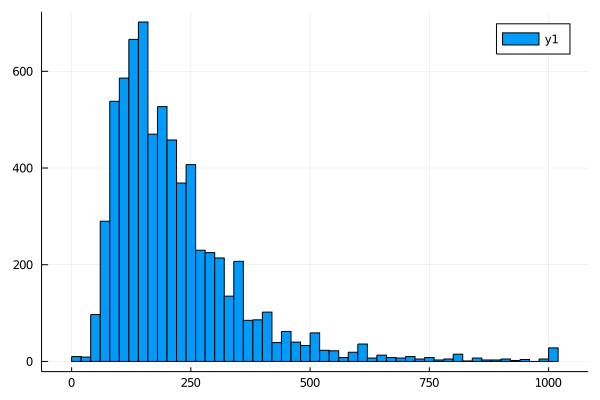

In [8]:
histogram(clamp.(df.price,0,1000))


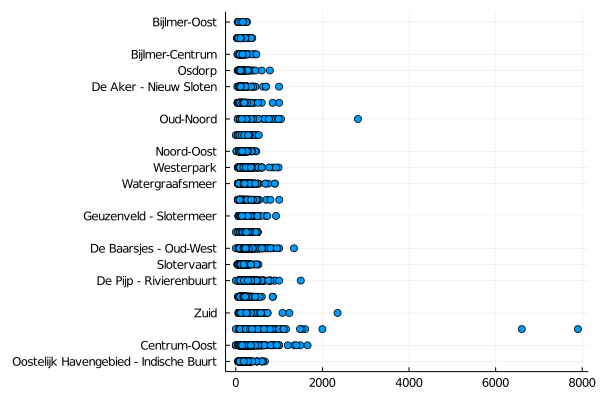

In [13]:
scatter(df.price,df.neighbourhood,legend=false)

In [ ]:
regX = df.distance_from_city_center
regY = df.price
X = hcat(ones(length(regX)),regX)
Y = regY
intercept,slope = inv(X'*X)*(X'*Y)